<a href="https://colab.research.google.com/github/jnramirezg/mecanica_de_solidos/blob/main/codigo/19-(4_3_3)-ley_hooke_isotropos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19. Ley de Hooke generalizada para materiales isótropos (sección 4.3.3)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-08-04 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-10-03 | Adecuando código a particularidades pedagógicas|

# Despeje de $\sigma_x$, $\sigma_y$, $\sigma_z$ 
A partir de las ecuaciones:
 
$\varepsilon_x = \displaystyle\frac{1}{E}\left(\sigma_x- \nu(\sigma_y+\sigma_z)\right)$ (<font color='blue'>1</font>)

$\varepsilon_y = \displaystyle\frac{1}{E}\left(\sigma_y- \nu(\sigma_x+\sigma_z)\right)$ (<font color='blue'>2</font>)

$\varepsilon_z = \displaystyle\frac{1}{E}\left(\sigma_z- \nu(\sigma_x+\sigma_y)\right)$ (<font color='blue'>3</font>)

Despejamos $\sigma_x$, $\sigma_y$, $\sigma_z$.

Importamos las funciones de librería simbólica ```sympy``` e iniciamos la impresión "bonita":

In [1]:
from sympy import *
init_printing()

Definimos en escritura $\LaTeX$ nuestras variables simbólicas:
- ```sx```, ```sy```, ```sz``` representan los esfuerzos axiales $\sigma_x$, $\sigma_y$, $\sigma_z$
- ```ex```, ```ey```, ```ez``` representan las deformaciones axiales $\varepsilon_x$, $\varepsilon_y$, $\varepsilon_z$
- ```E``` representa el módulo de la elasticidad y ```nu``` representa el coeficiente de Poisson $\nu$.

In [2]:
sx, sy, sz = symbols("     sigma_x      sigma_y      sigma_z")
ex, ey, ez = symbols("varepsilon_x varepsilon_y varepsilon_z")
E, nu = symbols("E nu")

ex, ey, ez, sx, sy, sz, E, nu

Las definimos igualándolas a cero (```ec1=0```, ```ec2=0```, ```ec3=0```):

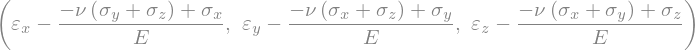

In [3]:
ec1 = ex - (1/E)*(sx - nu*(sy + sz))
ec2 = ey - (1/E)*(sy - nu*(sx + sz))
ec3 = ez - (1/E)*(sz - nu*(sx + sy))

ec1, ec2, ec3

Despejamos ```sx```, ```sy``` y ```sx``` de las ecuaciones correspondientes a $\sigma_x$, $\sigma_y$ y $\sigma_z$

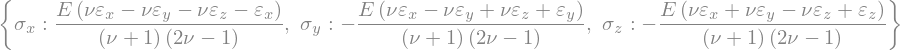

In [4]:
factor(solve([ec1, ec2, ec3], 
             [ sx,  sy,  sz]))

Que pueden reescribirse como:

$\sigma_x=\lambda e + 2G\varepsilon_x$ (<font color='blue'>4</font>)

$\sigma_y=\lambda e + 2G\varepsilon_y$ (<font color='blue'>5</font>)

$\sigma_z=\lambda e + 2G\varepsilon_z$ (<font color='blue'>6</font>)

Donde:

$e=\displaystyle \varepsilon_{x} + \varepsilon_{y} + \varepsilon_{z}$ (<font color='blue'>7</font>)

$\displaystyle \lambda = \frac{\nu E}{(1+\nu)(1-2\nu)}$ (<font color='blue'>8</font>)

$\displaystyle G= \frac{E}{2(1+\nu)}$ (<font color='blue'>9</font>)

## Coeficientes de la matriz constitutiva $\underline{\underline{D}}$

Definimos las variables faltantes (esfuerzos cortantes y deformacines angulares):

- ```txy```, ```txz```, ```tyz``` representan los esfuerzos cortantes $\tau_{xy}$, $\tau_{xz}$, $\tau_{yz}$
- ```gxy```, ```gxz```, ```gyz``` representan las deformaciones angulares $\gamma_{xy}$, $\gamma_{xz}$, $\gamma_{yz}$


In [5]:
txy, txz, tyz  = symbols("  tau_xy   tau_xz   tau_yz")
gxy, gxz, gyz  = symbols("gamma_xy gamma_xz gamma_yz")

txy, txz, tyz, gxy, gxz, gyz

Definimos la dilatación cúbica ```e``` que viene dada por la ecuación (<font color='blue'>7</font>):


In [6]:
e = ex + ey + ez

Definimos las constantes de Lamé ```lamb``` ($\lambda$) y ```G``` (G), que vienen dadas por las ecuaciones (<font color='blue'>8</font>) y (<font color='blue'>9</font>), respectivamente:

In [7]:
lamb = nu*E / ((1+nu)*(1-2*nu))
G = E / (2 * (1+nu))

Definimos las ecuaciones de Lamé, que vienen dadas por las ecuaciones (<font color='blue'>4</font>), (<font color='blue'>5</font>), (<font color='blue'>6</font>) y por las ecuaciones:

$\tau_{xy}=G\gamma_{xy}$

$\tau_{xz}=G\gamma_{xz}$

$\tau_{yz}=G\gamma_{yz}$

In [8]:
sx = lamb*e + 2*G*ex
sy = lamb*e + 2*G*ey
sz = lamb*e + 2*G*ez
txy = G*gxy
txz = G*gxz
tyz = G*gyz

Despejamos la matriz constitutiva $\underline{\underline{D}}$ para el caso isótropo con la función```sympy.linear_eq_to_matrix()```:

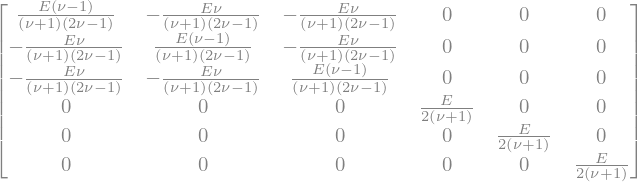

In [9]:
D = linear_eq_to_matrix([sx, sy, sz, tyz, txz, txy], 
                        [ex, ey, ez, gyz, gxz, gxy])[0]
simplify(D)

Podemos factorizar $\displaystyle\frac{E}{1+\nu}$, obteniendo:

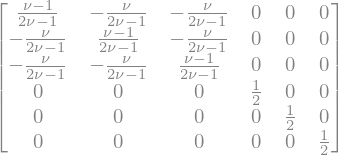

In [10]:
simplify(D / (E/(1+nu)))

**Nota:** Podrá pensar que el resultado es el negativo de lo que debería ser, pero no lo es, simplemente debe factorizar (-1) de los términos fraccionarios asociados a los esfuerzos normales.

Finalmente, la ley de Hooke generalizada para materiales isótropos en forma matricial es:

$$\underbrace{\left[\begin{matrix} \sigma_x\\ \sigma_y\\ \sigma_z\\ \tau_{yz}\\ \tau_{xz}\\ \tau_{xy}\\\end{matrix}\right]}_{\displaystyle\underline{\sigma}}
=\underbrace{\displaystyle\frac{E}{1+\nu}
\left[\begin{matrix}
\frac{1-\nu}{1-2\nu} & \frac{\nu}{1-2\nu}   &   \frac{\nu}{1-2\nu} &           0 &           0 & 0\\
\frac{\nu}{1-2\nu}   & \frac{1-\nu}{1-2\nu} &   \frac{\nu}{1-2\nu} &           0 &           0 & 0\\
\frac{\nu}{1-2\nu}   & \frac{\nu}{1-2\nu}   & \frac{1-\nu}{1-2\nu} &           0 &           0 & 0\\
                        0 &                         0 &                         0 & \frac{1}{2} &           0 & 0\\
                        0 &                         0 &                         0 &           0 & \frac{1}{2} & 0\\
                        0 &                         0 &                         0 &           0 &           0 & \frac{1}{2}
\end{matrix}\right]}_{\displaystyle\underline{\underline{D}}}
\underbrace{\left[\begin{matrix} \varepsilon_x\\ \varepsilon_y\\ \varepsilon_z\\ \gamma_{yz}\\ \gamma_{xz}\\ \gamma_{xy}\\\end{matrix}\right]}_{\displaystyle\underline{\varepsilon}}$$